# Numerical Methods
Most differential equations cannot be solved explicitly using elementary functions however we can always approximate solutions using numerical methods. the order of a numerical method describes how much the error decreases as the step size decreases. Higher order methods are more accurate however they require more computations to implement. Euler's method is the simplest method however the Runge-Kutta method(RK4) is the most commonly used in practice.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Setup
Throughout this section, let $y(t)$ denote the unique solution of a first order differential equation with an initial condition: $$y^{\prime}=f(t, y), y(t_{0}) =y_{0} $$
A numerical method is an algorithm which approximates the solution $y(t)$. In particular, given a sequence of values $t_{1}, t_{2}, t_{3}, \dots,$ a numerical method computes a sequence $y_{1}, y_{2}, y_{3}, \dots$ which approximates the solution at the given $t$ values: $$y_{n} \approx y(t_{n})$$
The $t$ values are usually chosen to be equally spaced with step size $h$: $$t_{n} = t_{0} + nh$$
All the numerical methods we consider below are examples of explicit Runge-Kutta methods which follow the same general procedure:
1. Given a point $(t_{n},y_{n})$, approximate slopes $k_{1}, \dots, k_{s}$, nearby using $f(t,y)$.
1. Compute an average $\overline{k}$ of the slopes $k_{1}, \dots, k_{s}$.
1. Compute the next value: $y_{n+1}=y_{n}+\overline{k}h.$
1. Repeat!

A method which computes $s$ slopes $k_{1}, \dots, k_{s}$ is called an $s$-stage method and the formula for the average $k$ depends on the method.

## Euler's Method
The simplest numerical method is Euler's method which uses the tangent line approximation: $$y(t+h) \approx y(t) + y^{\prime}h$$ 
Euler's method is given by the recursive formula: $$h = t_{n+1} - t_{n} \\ k_1=f(t_{n},y_{n}) \\ y_{n+1} =y_{n}+k_{1}h$$
Write a function called `odeEuler` which takes input parameters `f`,`t`,and `y0` where:
* `f` is a function which represents the right side of the equation $y'=f(t,y)$
* `t` is a 1D Numpy array
* `y0` is an initial value $y(t_{0})=y_{0}$ where $t_{0}$ is the value `t[0]`
The function `odeEuler` returns a 1D NumPy array of $y$ values which approximate the solution $y(t)$ using Euler's method.

In [2]:
def odeEuler(f, t, y0):
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0, len(t)-1):
        h = t[n+1] - t[n]
        k1 = f(t[n],y[n])
        y[n+1] = y[n] + k1*h
    return y

Consider the equation $$y^{\prime}=y\cos{t}, y(0)=1$$
The equation is separable and we solve using separation of variables: $$y(t)=e^{\sin{t}}$$
Plot the approximation by Euler's method with step hize $h=0.25$ and plot the exact solution on the interval $0\leq t  \leq 2\pi$.

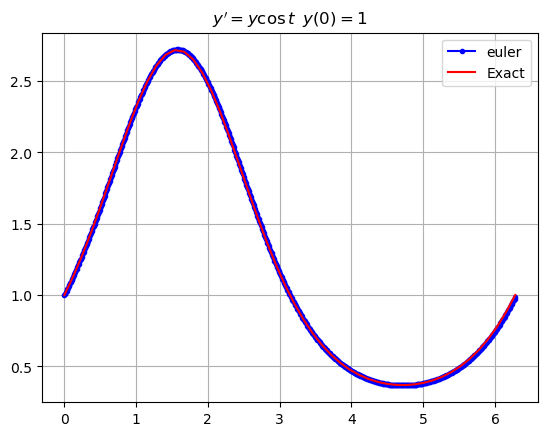

In [3]:
f = lambda t, y: y*np.cos(t)
y0 = 1; t0 = 0; tf = 2*np.pi;
h = 0.01; N=int((tf-t0)/h)+1;
t = np.linspace(t0,tf, N+1)
y = odeEuler(f, t, y0)
plt.plot(t, y, 'b.-')
t_exact = np.linspace(t0, tf, 50)
y_exact = np.exp(np.sin(t_exact))
plt.plot(t_exact, y_exact, 'r')
plt.grid(True), plt. title("$y^{\prime} = y\cos{t} \, \ y(0)=1$")
plt.legend(["euler", "Exact"])
plt.show()

## Heun's Method
Euler's method uses the degree 1 Taylor polynomial (i.e. the tangent line) to approximate $y(t)$. Heun's method is constructed from the degree 2 Taylor polynomial:
$$y(t+h) \approx y(t) + y^{\prime}(t)h+ \frac{y^{\prime \prime}}{2}h^{2}$$
We only want to use $y^{\prime}=f(t,y)$ in our approximation therefore introduce the forward difference formrula to approximate $y^{\prime \prime}$ in terms of $y^{\prime}$
$$y^{\prime \prime} = \frac{y^{\prime}(t+h)-y^{\prime}(t)}{h}$$
Put these together to approximate $y(t+h)$: 
$$y(t+h) \approx y(t) + \frac{y^{\prime}(t+h)+y^{\prime}(t)}{2}h$$
We know to how to paproximate $y^{\prime}(t)$. What about $y^{\prime}(t+h)$?
Use Euler's method $y(t+h)\approx y(t) +y^{\prime}(t)h$ to approximate;
$$y^{\prime} (t+h) = f(t+h, y(t+h)) \approx f(t+h, y(t)+y^{\prime}(t)h)$$
Heun's method is given by the 2-stage recursive formula:
$$ h = t_{n+1} -t_{n} \\ k_{1} = f(t_{n},y_{n}) \\ k_{2} = f(t_{n}+h, y_{n}+k_{1}h)\\y_{n+1} = y_{n} + \left(\frac{k_{1}+k_{2}}{2}\right)h$$

Write a function called `odeHeun` which takes input parameters `f`, `t`, and `y0` where:
* `f` is a function which represents the right side of the equation $y^{\prime}=f(t,y)$
* `t` is a 1D NumPy array
* `y0` is an initial value $y(t_{0})=y_{0}$ where $t_{0}$ is the value `t[0]`
The function `odeHeun` returns a 1D NumPy array of $y$ values which approximate the solution $y(t)$ using Heun's method.

In [4]:
def odeHeun(f, t, y0):
    y = np.zeros(len(t))
    y[0]=y0
    for n in range(0, len(t)-1):
        h = t[n+1] - t[n]
        k1 = f(t[n],y[n])
        k2 = f(t[n+1], y[n]+k1*h)
        y[n+1] = y[n] + (k1+k2)/2*h
    return y

Let us again consider the equation $$y^{\prime} = y\cos{t}, y(0)=1$$ and the exact solution $$y(t)=e^{\sin{t}}$$
Plot the approximation using both Euler's method and Heun's method with step size $h=0.25$ and plot the exact solution on the interval $0 \leq t \leq 2\pi$.

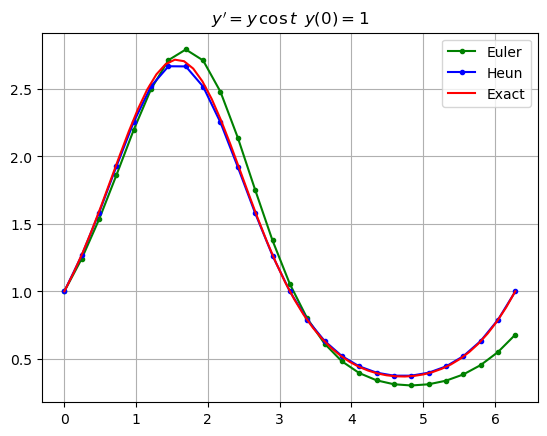

In [5]:
f = lambda t, y: y*np.cos(t)
y0 = 1; t0 = 0; tf = 2*np.pi;
h = 0.25; N = int((tf-t0)/h)+1;
t = np.linspace(t0, tf, N+1)
y_euler = odeEuler(f, t, y0) ; plt.plot(t, y_euler, 'g.-');
y_heun = odeHeun(f, t, y0); plt.plot(t, y_heun, 'b.-')
t_exact = np.linspace(t0, tf, 50)
y_exact = np.exp(np.sin(t_exact))
plt.plot(t_exact, y_exact, 'r')
plt.grid(True), plt.title("$y^{\prime} = y\, \cos{t}\, \ y(0) = 1 $")
plt.legend(["Euler", "Heun", "Exact"])
plt.show()

Heun's method computes a better approximation compared to Euler's method as expected.

## RK4 Method
Let an IVP be specified as follows:
$$\frac{dy}{dt} = f(t,y) , y(t_{0})=y_{0}.$$
Then, the RK4 method is $$y_{n+1} = y_{n} +\frac{1}{6}(k_{1}+2k_{2}+2k_{3}+k_{4})h, \\ t_{n+1} =t_{n}+h$$
where $$k_{1} = f(t_{n},y_{n}), \\ k_{2} = f(t_{n}+\frac{h}{2}, y_{n}+h\frac{k1}{2}),\\
k3 = f(t_{n}+\frac{h}{2}, y_{n}+h\frac{k_{2}}{2}), \\ k_{4} = f(t_{n}+h, y_{n}+hk_{3}).$$
Here $y_{n+1}$ is the RK4 approximation of $y(t_{n+1})$, and the next value $(y_{n+1})$ is determined by the present value $(y_{n})$ plus the weighted average of four increments, where each increment is the product of the size of the interval, "$h$", and an estimated slope specified by function "$f$" on the right-hand side of the differential equation.

In averaging the four slopes, greater weight is given to the slopes at the midpoint. If $f$ is independent of $y$, so that the differential equation is equivalent to a simple integral ,then RK4 is Simpson's rule.

### Error Analysis
#### Order of Accuracy
Let $y_{1}$ be the approximation of $y(t_{1})$ by one step of some numerical method using step size $h=t_{1}-t_{0}$. The **(local) truncation error** (fro the given differential equation and method) is $$E(h)=\left| y(t_{1})-y_{1}\right|$$
The word *local* means we are looking at just one step of the method and the word *truncation* has to do with runcating the Taylor series.\\
Most numerical methods are based on Taylor series therefore the error may be expressed in terms of Taylors' theorem. For example, consider the Taylor series up to order $p$ evaluated at $t_{1} = t_{0}+h$:
$$y(t_{1})=y(t_{0}) + y^{\prime}(t_{0})h+ \cdots + \frac{y^{(p)}(t_{0})}{p!}h^{p} + \frac{y^{(p+1)}(c)}{(p+1)!}h^{p+1}$$
for some $ c \in \left[t_{0}, t_{1}\right]$. If a numerical method computes $y(t_{1})$ using the Taylor polynomial of degree $p$ then the local truncation error is
$$E(h)=\left|y(t_{1})-y_{1}\right| = \frac{\left|y^{(p+1)}(c)\right|}{(p+1)!}h^{p+1}$$
Threrefore we can roughly say that a numerical method is order $p$ if the local truncation error looks like $Ch^{p+1}$ for some constant $C$.
More precisely, a numerical method is **order** $p$ if the local truncation error satisfies 
$$E(h)\leq Ch^{p+1}$$
for any equation $y^{\prime}=f(t,y), y(t_{0}) = y_{0}$. The constant $C$ depends on $f$. Note that the order is a positive integer.\\
It is usually quite difficult to determine the order of a numerical method given th formula. Instead, we can determine the order experimentally. The idea is that the local truncation error should satisfy $$E(h) \approx Ch^{p+1}$$
when applied to most differential equations. Therefore we may observe the slope in the log plot:
$$\log{(E(h))} \approx (p+1)\log{h}+\log{C}$$
The procedure to experimentally determine the order $p$ of a numerical method is:
1. Apply the numerical method to the equation $y^{\prime}=y, y(0)=1$ for different steps size $h_{1}$ and $h_{2}$.
1. Compute the local truncation errors $E(h_{1})$ and $E(h_{2})$ using the exact solution $y(t)=e^{t}$.
1. Compute the slope of the log plot: $$p+1\approx \frac{\log{(E(h_{2}))} - \log{(E(h_{1}))}}{\log{h_2}-\log{h_1}}$$

##### Examples
##### Euler's Method is Order 1
Euler's method is built using the degree 1 Taylor polynomial. Taylor's theorem says
$$y(t_{1})=y(t_{0})+y^{\prime}(t_{0})(t_{1}-t_{0}) + \frac{y^{\prime \prime}(c)}{2}(t_{1}-t_{0})^{2}$$
for some $c \in [t_{0}, t_{1}]$. Therefore, if $\left|y^{\prime \prime}(t)\right| \leq K_{2}$ for all $t \in \left[ t_{0}, t_{1} \right]$, then
$$E(h) = \left|\frac{y^{\prime \prime}(c)}{2}(t_{1}-t_{0})^{2}\right| \leq \frac{K_{2}}{2}h^{2}$$
Therefore Euler's method is order 1. Let's verify the order of Euler's method experimentally by plotting the local truncation error for Euler's method applied to $y^{\prime}=y, y(0)=1$.

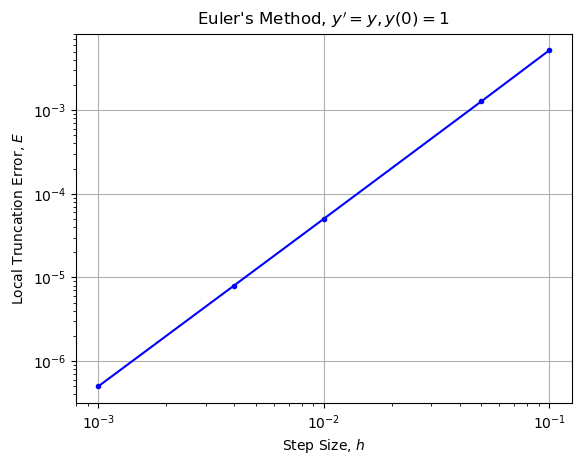

2.024347026640165
2.008325982940494
2.002185261087724
2.0007216479204177


In [6]:
f = lambda t, y:y
y0 = 1;
h = [0.1, 0.05, 0.01, 0.004, 0.001]
E = np.zeros(len(h))
for n in range(0, len(h)):
    y = odeEuler(f, [0, h[n]], y0)
    y1 = y[1]
    y1_exact = np.exp(h[n])
    E[n] = np.abs(y1_exact - y1)

plt.loglog(h, E, 'b.-'), plt.grid(True)
plt.title("Euler's Method, $y^{\prime}=y, y(0)=1$")
plt.xlabel("Step Size, $h$"), plt.ylabel("Local Truncation Error, $E$")
plt.show()

for j in range(len(h)-1):
    print((np.log(E[j+1]) - np.log(E[j]))/(np.log(h[j+1])-np.log(h[j])))

##### Heun's Method is Order 2
Heun's method is built using the degree 2 Taylor polynomial therefore we expect the method to be order 2. Let's verify the order of Heun's method experimentally by plotting the local truncation error for Heun's method applied to $y^{\prime}=y, y(0)=1$.

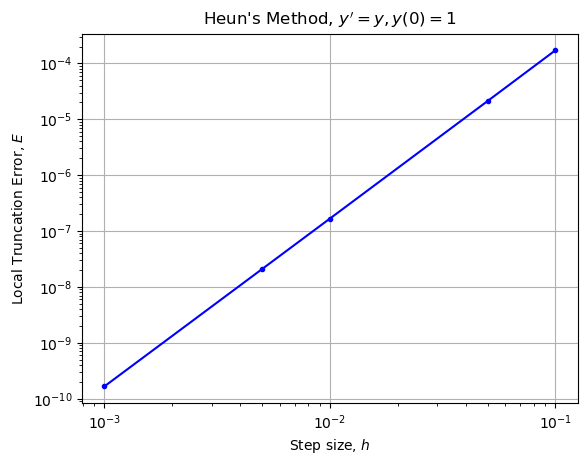

3.0182378826305905
3.006241389698562
3.0018054120486792
3.000621298955094


In [7]:
f = lambda t, y:y
y0 = 1;
h = [0.1, 0.05, 0.01, 0.005, 0.001]
E = np.zeros(len(h))
for n in range(0, len(h)):
    y = odeHeun(f, [0,h[n]], y0)
    y1 = y[1]
    y1_exact = np.exp(h[n])
    E[n] = np.abs(y1_exact - y1)

plt.loglog(h, E, 'b.-'), plt.grid(True)
plt.title("Heun's Method, $y^{\prime}=y, y(0)=1$")
plt.xlabel("Step size, $h$"), plt.ylabel("Local Truncation Error, $E$")
plt.show()

for j in range(len(h)-1):
    print((np.log(E[j+1])-np.log(E[j]))/(np.log(h[j+1])-np.log(h[j])))

The loglog plot has slope 3 therefore Heun's method is order 2 as expected since Heun's method is built from the degree 2 Taylor approximation

## System of Equation

## First Order Systems
Every system of differential equations is equivalent to a first order system in a higher dimension. For example, consider a second order differential equation $$y^{\prime \prime}+by^{\prime}+cy =F(t)$$
where $a, b, c$ are constants (with $a \neq 0$) and $F(t)$ is a known function. The unknown function $y(t)$ is second order in the equation the new variables $u_{0} =y$ and $u_{1}=y^{\prime}$ and write the 1-dimensional second order equation as a 2-dimensional first order system
\begin{align*}
u_{0}^{\prime} &= u_{1}\\
u^{\prime}_{1}&=(F(t)-bu_{1}-c_{0})/a
\end{align*}

The procedure for any system is similar:
1. Identify the order of each unknown function in the system.
1. If $y$ has order $n$ then introduce $n$ new variables $u_{0}=y, u_{1}=y^{\prime}, \dots, $
1. Rewrite the equations in terms of the new variables only.

For example, consider the system 
\begin{align*}
x^{\prime} = xy + 
\end{align*}

In [8]:
import numpy as np
import matplotlib.pyplot as plt